<a href="https://colab.research.google.com/github/Shrishml/Tokyo2020-Tweets-Kaggle/blob/main/tokyo_2020_data_kaggle_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys

In [2]:
sys.path.append('/content/drive/MyDrive/Projects/env')

In [ ]:
! mkdir /content/drive/MyDrive/Projects/env/.kaggle

mkdir: cannot create directory ‘/content/drive/MyDrive/Projects/env/.kaggle’: File exists


In [ ]:
#! cp kaggle.json /content/drive/MyDrive/Projects/env/.kaggle/

# above was not working, I manually uploaded them to the target folder

In [ ]:
! chmod 600 /content/drive/MyDrive/Projects/env/.kaggle/kaggle.json

In [ ]:
# ! kaggle competitions download <name-of-competition>

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Projects/env/.kaggle"

In [ ]:
! kaggle datasets download -d  gpreda/tokyo-olympics-2020-tweets 

tokyo-olympics-2020-tweets.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! unzip tokyo-olympics-2020-tweets

Archive:  tokyo-olympics-2020-tweets.zip
  inflating: tokyo_2020_tweets.csv   


In [ ]:
! cp /content/tokyo_2020_tweets.csv /content/drive/MyDrive/Projects/2_tokyo_2020_tweets_kaggle

In [ ]:
! rm /content/tokyo_2020_tweets.csv

rm: cannot remove '/content/tokyo_2020_tweets.csv': No such file or directory


In [4]:
sys.path.append('/content/drive/MyDrive/Projects/2_tokyo_2020_tweets_kaggle')

In [3]:
import numpy as np 
import pandas as pd
import matplotlib
import seaborn as sns
import os
import matplotlib.pyplot as plt

In [5]:
os.chdir('/content/drive/MyDrive/Projects/2_tokyo_2020_tweets_kaggle')

In [6]:
cwd = os.getcwd()
cwd   # current directory changed to current working directory

'/content/drive/MyDrive/Projects/2_tokyo_2020_tweets_kaggle'

In [7]:
df = pd.read_csv('tokyo_2020_tweets.csv') # now this is working fine

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
df.head(7)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1418888645105356803,Abhishek Srivastav,"Udupi, India",Trying to be mediocre in many things,2021-02-01 06:33:51,45,39,293,False,2021-07-24 10:59:49,Let the party begin\n#Tokyo2020,['Tokyo2020'],Twitter for Android,0.0,0.0,False
1,1418888377680678918,Saikhom Mirabai Channu🇮🇳,"Manipur, India",Indian weightlifter 48 kg category. Champion🏆,2018-04-07 10:10:22,5235,5,2969,False,2021-07-24 10:58:45,Congratulations #Tokyo2020 https://t.co/8OFKMs...,['Tokyo2020'],Twitter for Android,0.0,0.0,False
2,1418888260886073345,Big Breaking,Global,All breaking news related to Financial Market....,2021-05-29 08:51:25,3646,3,5,False,2021-07-24 10:58:17,Big Breaking Now \n\nTokyo Olympic Update \n\n...,NaN,Twitter for Android,0.0,1.0,False
3,1418888172864299008,International Hockey Federation,Lausanne,Official International Hockey Federation Twitt...,2010-10-20 10:45:59,103975,2724,36554,True,2021-07-24 10:57:56,Q4: 🇬🇧3-1🇿🇦\n\nGreat Britain finally find a wa...,NaN,Twitter Web App,1.0,0.0,False
4,1418886894478270464,Cameron Hart,Australia,Football & Tennis Coach,2020-10-31 08:46:17,6,37,31,False,2021-07-24 10:52:51,All I can think of every time I watch the ring...,"['Tokyo2020', 'ArtisticGymnastics', '7Olympics...",Twitter for iPhone,0.0,0.0,False
5,1418885092571766792,Sab Joke H,India,Follows you,2020-09-05 19:50:35,107,88,102,False,2021-07-24 10:45:42,#Tokyo2020 #Olympics\n#MirabaiChanu\n#Weightli...,"['Tokyo2020', 'Olympics', 'MirabaiChanu', 'Wei...",Twitter for Android,0.0,0.0,False
6,1418880445161353228,evija87,City by the water,Eva. | Watch Lucifer on Netflix📺 coming MAY 28TH,2009-12-01 23:55:34,224,652,84310,False,2021-07-24 10:27:14,Can't help but cheer for them. Banda 6 goals i...,NaN,Twitter Web App,0.0,0.0,False


In [ ]:
# get info of the dataframe

In [9]:
df.shape

(297011, 16)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297011 entries, 0 to 297010
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                297011 non-null  object 
 1   user_name         165938 non-null  object 
 2   user_location     127916 non-null  object 
 3   user_description  157311 non-null  object 
 4   user_created      160532 non-null  object 
 5   user_followers    160532 non-null  object 
 6   user_friends      160531 non-null  object 
 7   user_favourites   160531 non-null  object 
 8   user_verified     160529 non-null  object 
 9   date              160531 non-null  object 
 10  text              160531 non-null  object 
 11  hashtags          123028 non-null  object 
 12  source            160530 non-null  object 
 13  retweets          160525 non-null  float64
 14  favorites         160525 non-null  float64
 15  is_retweet        160525 non-null  object 
dtypes: float64(2), objec

In [11]:
df.isnull().sum()

id                       0
user_name           131073
user_location       169095
user_description    139700
user_created        136479
user_followers      136479
user_friends        136480
user_favourites     136480
user_verified       136482
date                136480
text                136480
hashtags            173983
source              136481
retweets            136486
favorites           136486
is_retweet          136486
dtype: int64

In [12]:
# let us drop all nan value

df_new =df.dropna()

In [13]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90091 entries, 0 to 297010
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                90091 non-null  object 
 1   user_name         90091 non-null  object 
 2   user_location     90091 non-null  object 
 3   user_description  90091 non-null  object 
 4   user_created      90091 non-null  object 
 5   user_followers    90091 non-null  object 
 6   user_friends      90091 non-null  object 
 7   user_favourites   90091 non-null  object 
 8   user_verified     90091 non-null  object 
 9   date              90091 non-null  object 
 10  text              90091 non-null  object 
 11  hashtags          90091 non-null  object 
 12  source            90091 non-null  object 
 13  retweets          90091 non-null  float64
 14  favorites         90091 non-null  float64
 15  is_retweet        90091 non-null  object 
dtypes: float64(2), object(14)
memory usage:

In [14]:
df_new.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1418888645105356803,Abhishek Srivastav,"Udupi, India",Trying to be mediocre in many things,2021-02-01 06:33:51,45,39,293,False,2021-07-24 10:59:49,Let the party begin\n#Tokyo2020,['Tokyo2020'],Twitter for Android,0.0,0.0,False
1,1418888377680678918,Saikhom Mirabai Channu🇮🇳,"Manipur, India",Indian weightlifter 48 kg category. Champion🏆,2018-04-07 10:10:22,5235,5,2969,False,2021-07-24 10:58:45,Congratulations #Tokyo2020 https://t.co/8OFKMs...,['Tokyo2020'],Twitter for Android,0.0,0.0,False
4,1418886894478270464,Cameron Hart,Australia,Football & Tennis Coach,2020-10-31 08:46:17,6,37,31,False,2021-07-24 10:52:51,All I can think of every time I watch the ring...,"['Tokyo2020', 'ArtisticGymnastics', '7Olympics...",Twitter for iPhone,0.0,0.0,False
5,1418885092571766792,Sab Joke H,India,Follows you,2020-09-05 19:50:35,107,88,102,False,2021-07-24 10:45:42,#Tokyo2020 #Olympics\n#MirabaiChanu\n#Weightli...,"['Tokyo2020', 'Olympics', 'MirabaiChanu', 'Wei...",Twitter for Android,0.0,0.0,False
8,1418889399081656321,International Hockey Federation,Lausanne,Official International Hockey Federation Twitt...,2010-10-20 10:45:59,103976,2724,36554,True,2021-07-24 11:02:49,Q3 🇨🇦 1-4 🇩🇪\n\nGreen card for Canada's captai...,"['Tokyo2020', 'CANvGER']",Twitter Web App,0.0,0.0,False


# Let us see how many are using android, iphone and web in india


In [15]:
df_india=df[df.user_location.str.contains('india').replace(np.nan, False)] # regex partial match

In [16]:
df_india

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
242,1418888523495714818,Zahid Patka,india,"I AM BHARATIYA MUSLIM, BJP MAHARASHTRA Minorit...",2011-09-24 08:28:33,3485,1214,25842,False,2021-07-24 10:59:20,PM @narendramodi Ji leading from the front to ...,NaN,Twitter for Android,0.0,0.0,False
551,1418887316924403715,Pankaj Priyadershi,india,"Senior Broadcast Journalist, BBC Delhi Politic...",2010-09-16 10:12:56,6226,1571,303,True,2021-07-24 10:54:32,Indian Boxer Vikas Krishan (69kg category) los...,"['IND', 'Boxing', 'Tokyo2020', 'Vikas']",Twitter for iPhone,0.0,0.0,False
1202,1418885006634545153,RK's Sketch Wood,"hyderabad, india.","""One-Stop-Solution for all your Interiors"" Ret...",2020-07-28 08:36:45,36,35,170,False,2021-07-24 10:45:21,Congratulations India 💐💐!!!\n\nIndia🥈🇮🇳 strike...,NaN,Twitter Web App,0.0,1.0,False
1482,1418883911971602432,🇮🇳🚨Tornado #MGW🚨🇮🇳,india,|| Nation first || RSS & Bhakt || Commentator-...,2010-02-12 16:20:05,100555,45997,68,False,2021-07-24 10:41:00,#Olympics Medal tally\n\n 🥇🥈🥉\n🇨🇳 2|0|1|3\...,['Olympics'],Twitter Web App,0.0,1.0,False
2869,1418879316897767424,Nms Reddy 💙,"india,kurnool",NaN,2017-03-04 01:01:36,1790,1696,29876,False,2021-07-24 10:22:45,Huge congratulations 👏 #MirabaiChanu \n#Silver...,"['MirabaiChanu', 'Silver', 'Tokyo2020']",Twitter for Android,0.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149656,1419906815853137923,Raj Kumar,india,never Give up . everyday is a new day. crypto ...,2021-06-09 03:22:15,71,1273,2547,False,2021-07-27 06:25:40,Elavenil Valarivan and Divyansh Singh Panwar f...,['shooting'],Twitter for Android,0.0,0.0,False
150526,1419918866373742593,Dr. Ashok Patel,india,"Vice Chancellor ARIU Armenia , #MBBS #MD #Radi...",2010-02-02 00:20:11,2521,1727,40279,False,2021-07-27 07:13:33,Boxing 🥊: Lovlina Borgohain wins 3-2 against N...,NaN,Twitter for iPhone,0.0,6.0,False
150685,1419917662289752071,Matka Result,india,matkaresult is a Fast Satta Matka Results & Fi...,2019-10-12 13:05:08,363,350,94,False,2021-07-27 07:08:46,India's No.1 #Sattamatka App | Best Official P...,"['Sattamatka', 'MatkaResult']",Twitter Web App,0.0,1.0,False
151287,1419913881137278979,Stupa Sport Analytics,"sector 7 rohini, Delhi (india)","STUPA, in its true sense, wants to bring the t...",2020-06-08 12:41:44,57,33,51,False,2021-07-27 06:53:44,An extravagant victory ✌ by the Japanese duo f...,NaN,Twitter for Android,0.0,0.0,False


In [17]:
df_india.source.unique()

array(['Twitter for Android', 'Twitter for iPhone', 'Twitter Web App'],
      dtype=object)

In [18]:
df_india.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206 entries, 242 to 155681
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                206 non-null    object 
 1   user_name         206 non-null    object 
 2   user_location     206 non-null    object 
 3   user_description  183 non-null    object 
 4   user_created      206 non-null    object 
 5   user_followers    206 non-null    object 
 6   user_friends      206 non-null    object 
 7   user_favourites   206 non-null    object 
 8   user_verified     206 non-null    object 
 9   date              206 non-null    object 
 10  text              206 non-null    object 
 11  hashtags          152 non-null    object 
 12  source            206 non-null    object 
 13  retweets          206 non-null    float64
 14  favorites         206 non-null    float64
 15  is_retweet        206 non-null    object 
dtypes: float64(2), object(14)
memory usage:

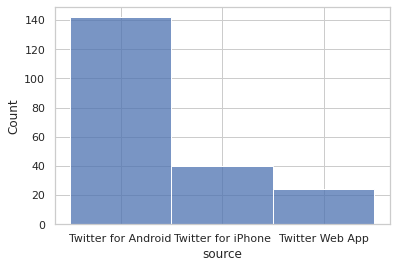

In [19]:
sns.set_theme(style="whitegrid")
sns.histplot(df_india.source)

In India most of user uses android, and least uses twitter web app

In [20]:
# fixing data and time coloums
df['datedt'] = pd.to_datetime(df['date'], errors='coerce')
df['year'] = df['datedt'].dt.year
df['month'] = df['datedt'].dt.month
df['day'] = df['datedt'].dt.day
df['dayofweek'] = df['datedt'].dt.dayofweek
df['hour'] = df['datedt'].dt.hour
df['minute'] = df['datedt'].dt.minute
df['dayofyear'] = df['datedt'].dt.dayofyear
df['date_only'] = df['datedt'].dt.date

In [21]:
df_agg = df.groupby(["date_only"])["text"].count().reset_index()
df_agg.columns = ["date_only", "count"]

In [22]:
def plot(df, x='date_only', y='count', hue=None, size=1, title="", is_log=False):
    f, ax = plt.subplots(1,1, figsize=(4*size,3*size))
    g = sns.lineplot(x=x, y=y, hue=hue, data=df)
    plt.xticks(rotation=90)
    if hue:
        plt.title('{} grouped by {} {}'.format(y, hue, title), fontsize=15)
    else:
        plt.title('{} | {}'.format(y, title), fontsize=15)
    if(is_log):
        ax.set(yscale="log")
    ax.grid(color='black', linestyle='dotted', linewidth=0.75);
    plt.xlabel('Date', fontsize=20);
    plt.ylabel('Count', fontsize=20);

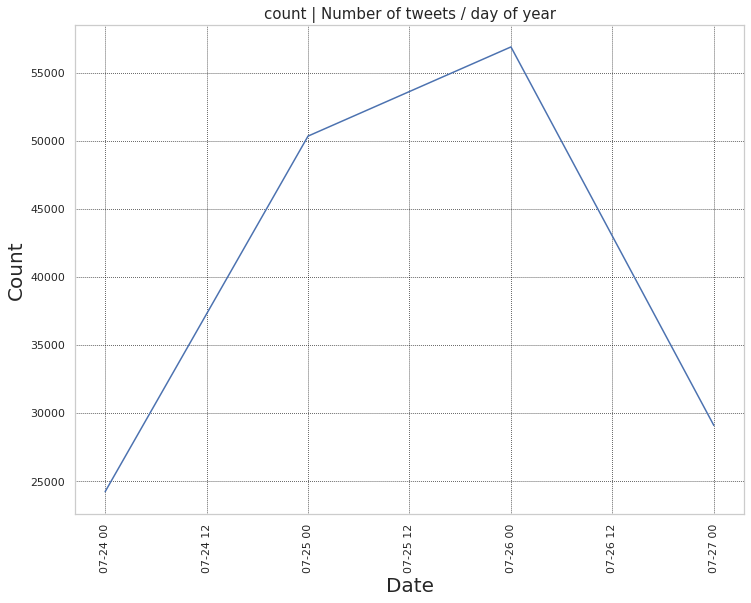

In [23]:
plot(df_agg, title="Number of tweets / day of year",size=3)

In [29]:

def bar_plot(feature, title, df, size=1, ordered=True):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    if ordered:
        g = sns.countplot(df[feature], order = df[feature].value_counts().index[:30], palette='Set3')
    else:
        g = sns.countplot(df[feature], palette='Set3')
    g.set_title("Number and percentage of {}".format(title[0]), fontsize=20)
    plt.xlabel(title[1], fontsize=15)
    plt.ylabel(title[2], fontsize=15)
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show()    

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


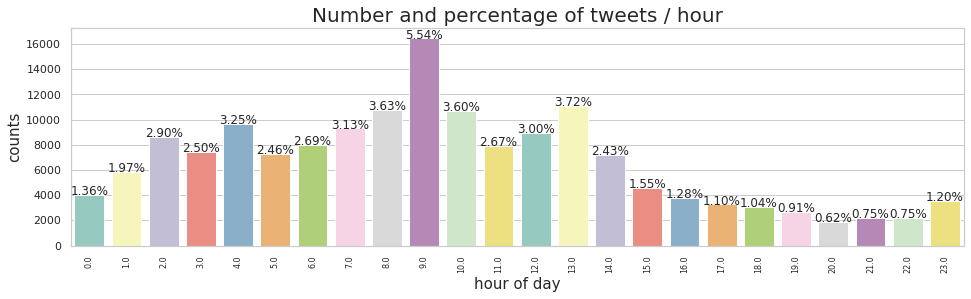

In [30]:
bar_plot("hour", ("tweets / hour", 'hour of day', 'counts'), df,size=4, ordered=False)

### In avove plot we see most of the tweets came on prime time. But we are unaware about the timezone has been taken into account or not.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


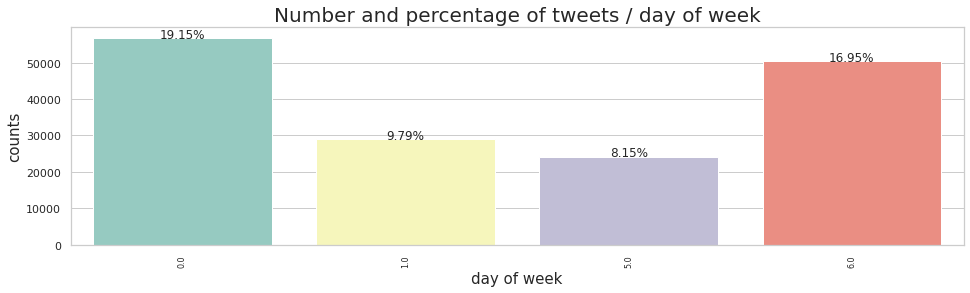

In [31]:
bar_plot("dayofweek", ("tweets / day of week", 'day of week', 'counts'), df,size=4, ordered=False)

In [33]:
# we see in above plot tweet frequence is substancially more on the weekends

## Now we will do some of the sentiment analysis

In [34]:
from wordcloud import WordCloud, STOPWORDS
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

# some codes are taken from https://www.kaggle.com/gpreda/tokyo-2020-tweets-sentiment-analysis

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [38]:
def show_wordcloud(data, title=""):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["t", "co", "https", "amp", "U", "Olympics" "Tokyo2020", "TokyoOlympics", "Olympic", "Olympics Tokyo2020", "Tokyo2020 Olympics"])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,background_color="black").generate(text)
    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

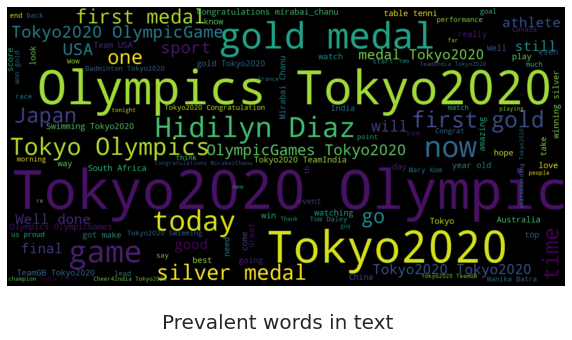

In [39]:
show_wordcloud(df['text'], title = 'Prevalent words in text')


In [41]:
import nltk
nltk.download('vader_lexicon')
  

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [51]:
sia = SentimentIntensityAnalyzer()
def find_sentiment(post):
    post =  str(post)
    if sia.polarity_scores(post)["compound"] > 0:
        return "Positive"
    elif sia.polarity_scores(post)["compound"] < 0:
        return "Negative"
    else:
        return "Neutral"     

In [43]:
def plot_sentiment(df, feature, title):
    counts = df[feature].value_counts()
    percent = counts/sum(counts)

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

    counts.plot(kind='bar', ax=ax1, color='green')
    percent.plot(kind='bar', ax=ax2, color='blue')
    ax1.set_ylabel(f'Counts : {title} sentiments', size=12)
    ax2.set_ylabel(f'Percentage : {title} sentiments', size=12)
    plt.suptitle(f"Sentiment analysis: {title}")
    plt.tight_layout()
    plt.show()

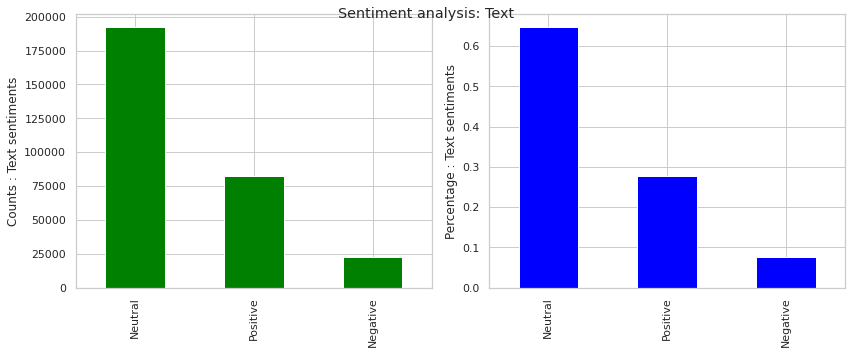

In [52]:
df['text_sentiment'] = df['text'].apply(find_sentiment)
plot_sentiment(df, 'text_sentiment', 'Text')

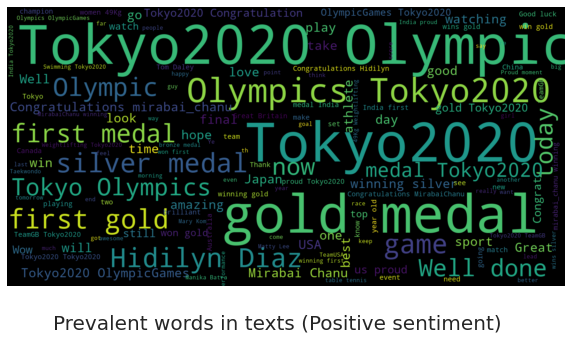

In [54]:
show_wordcloud(df.loc[df['text_sentiment']=='Positive', 'text'], 
               title = 'Prevalent words in texts (Positive sentiment)')


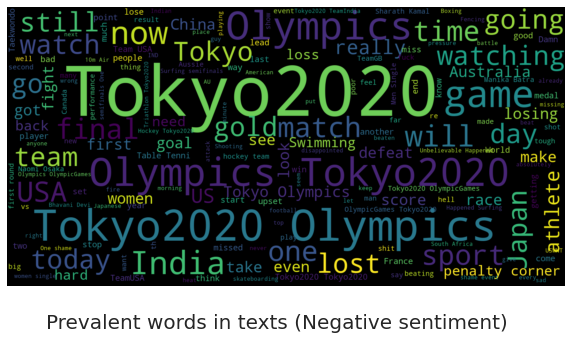

In [56]:
show_wordcloud(df.loc[df['text_sentiment']=='Negative', 'text'],
               title = 'Prevalent words in texts (Negative sentiment)')